# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

The purpose of the project is to perform an analysis on Megaline's client. The objective is to findout which of the two plans, surf or ultimate, bring in more revenue. To findout which plan brings in more revenue, I will be looking at the clients' behavior, validating the data and merging the necessary data to form dataframes that will help me findout which plan brings in more revenue. I will then do a hypothesis test at the end to see whether our assumptions are correct or not.


# Contents <a id='back'></a>

* [Initialization](#Initialization)
    * [Load data](#Load_data)
    * [Prepare the data](#Prepare_the_data)
    * [Plans](#Plans)
    * [Users](#Users)
    * [Calls](#Calls)
    * [Messages](#Messages)
    * [Internet](#Internet)
* [Study plan conditions](#Study_plan_conditions)
* [Aggregate data per user](#Aggregate_data_per_user)
* [Study user behabiour](#Study_user_behaviour)
    * [Calls](#Calls)
    * [Messages](#Messages)
    * [Internet](#Internet)
* [Revenue](#Revenue)
* [Test statistical hypothesis](#Test_statistical_hypotheses)
* [General conclusion](#General_conclusion)


# Initialization

Below are the librabries that are used throughout this project.

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Load data

Below all the data is imported and set as dataframes.

In [1]:
# Load the data files into different DataFrames
try:
    calls_df = pd.read_csv('C:/Users/Wandile/Documents/PracticumProjects/StatisticalDataAnalysis/megaline_calls.csv')
    internet_df = pd.read_csv('C:/Users/Wandile/Documents/PracticumProjects/StatisticalDataAnalysis/megaline_internet.csv')
    messages_df = pd.read_csv('C:/Users/Wandile/Documents/PracticumProjects/StatisticalDataAnalysis/megaline_messages.csv')
    plans_df = pd.read_csv('C:/Users/Wandile/Documents/PracticumProjects/StatisticalDataAnalysis/megaline_plans.csv')
    users_df = pd.read_csv('C:/Users/Wandile/Documents/PracticumProjects/StatisticalDataAnalysis/megaline_users.csv ')
except:
    calls_df = pd.read_csv('/datasets/megaline_calls.csv')
    internet_df = pd.read_csv('/datasets/megaline_internet.csv')
    messages_df = pd.read_csv('/datasets/megaline_messages.csv')
    plans_df = pd.read_csv('/datasets/megaline_plans.csv')
    users_df = pd.read_csv('/datasets/megaline_users.csv')


NameError: name 'pd' is not defined

## Prepare the data

The data in this project is in different dataframes. Below I will be looking at all the different dataframes and seeing if there are any errors in the data and fixing them accordingly, if they are there.

## Plans

In [3]:
# General information about the plans' DataFrame
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
plans_df.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [5]:
# Sample of data for plans
plans_df.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Observation: This dataframe is just a dataframe that shows the prices and information about each plan. There are no missing values or duplicated data in this dataframe.

## Users

In [6]:
# General/summary information about the users' DataFrame
users_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
users_df.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [8]:
# Checking duplicated data
users_df.duplicated().sum()

0

In [9]:
# Checking missing data
users_df.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [10]:
# Sample of data for users
users_df.sample(5)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
343,1343,Teresia,Ewing,43,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-08-23,surf,NaN
432,1432,Azucena,Goodwin,59,"Salt Lake City, UT MSA",2018-10-03,ultimate,NaN
317,1317,Ruthanne,Heath,70,"Phoenix-Mesa-Chandler, AZ MSA",2018-11-11,ultimate,NaN
359,1359,Sherley,Norris,33,"Colorado Springs, CO MSA",2018-02-08,surf,NaN
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07


In [11]:
# Displaying data without missing values
users_df[-users_df['churn_date'].isna()]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07
54,1054,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24
83,1083,Lyndia,Acevedo,65,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-26,surf,2018-12-18
84,1084,Wiley,Mckinney,21,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-06-04,surf,2018-11-11
94,1094,Walter,Petersen,54,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-30,surf,2018-12-12


Observation: In this dataframe we see the users, their id, name, surname, age, registration date, the plan they use, lastly the churn date. From the info table it is seen that the churn date and registration date are in objects and should be datetime datatypes. So they have to be changed. It is also seen that there are no missing values and duplicates in the dataframe.

### Fix Data

Below the registration date and churn date data types are changed from object types to datetime.

In [12]:
# Changing to datetime
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'],format='%Y-%m-%d')
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'],format='%Y-%m-%d')
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enrich Data

Below I am adding the churn period column to show the days of churning that users are in after registration.

In [13]:
# Adding to churn period column 
users_df['churn_period'] = users_df['churn_date']-users_df['reg_date']
users_df[-users_df['churn_date'].isna()]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churn_period
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,21 days
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16,141 days
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,140 days
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30,7 days
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07,201 days
54,1054,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31,254 days
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24,61 days
83,1083,Lyndia,Acevedo,65,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-26,surf,2018-12-18,53 days
84,1084,Wiley,Mckinney,21,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-06-04,surf,2018-11-11,160 days
94,1094,Walter,Petersen,54,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-30,surf,2018-12-12,43 days


## Calls

In [14]:
# General/summary information about the calls' DataFrame
calls_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [15]:
# Checking for duplicated data
calls_df.duplicated().sum()

0

In [16]:
# Checking for missing data
calls_df.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [17]:
# Checking data values
calls_df.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [18]:
# Sample of data for calls
calls_df.sample(5)


,id,user_id,call_date,duration
22823,1082_984,1082,2018-08-18,2.78
27095,1101_422,1101,2018-11-14,2.28
64862,1236_131,1236,2018-04-25,0.00
33544,1126_247,1126,2018-12-05,6.62
122906,1434_209,1434,2018-06-23,0.00


Observation: Above we see the calls dataframe. It shows the id of the call, user id the call date and the duration of the call. From the info table it is seen that the call date is an obect type and must be changed to a datetime type. It is also seen that there are no missing values and duplicates in the dataframe.

### Fix data

Below the call date column datatype is changed from an object type to a datetime.

In [19]:
# Change to datetime
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'],format='%Y-%m-%d')
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


## Messages

In [20]:
# General/summary information about the messages' DataFrame
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [21]:
# Checking missing data
messages_df.shape

(76051, 3)

In [22]:
# Checking duplicated data
messages_df.duplicated().sum()

0

In [23]:
# Sample of data for messages
messages_df.sample(5)

,id,user_id,message_date
19429,1126_71,1126,2018-12-29
35283,1224_351,1224,2018-07-14
35684,1235_10,1235,2018-11-30
73551,1472_108,1472,2018-06-19
3860,1038_213,1038,2018-12-08


Observation: Above we see the message dataframe. In this dataframe we see the id of the message the user id and the message date of the message. From the info table it is seen that the message date data type is an object and it must be changed to a datetime type. It is also seen that there are no missing values and duplicates in the dataframe.

### Fix data

Below the message date column datatype is changed from an object type to a datetime.

In [24]:
# Changing to datetime
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'],format='%Y-%m-%d')
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


## Internet

In [25]:
# General/summary information about the internet DataFrame
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [26]:
# Checking overall data
internet_df.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [27]:
# Checking missing data
internet_df.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [28]:
# Checking duplicated data
internet_df.duplicated().sum()

0

In [29]:
# Sample of data for the internet traffic
internet_df.sample(5)

,id,user_id,session_date,mb_used
59590,1268_259,1268,2018-07-27,858.50
102191,1490_6,1490,2018-10-29,499.28
31733,1144_474,1144,2018-07-29,563.84
9718,1050_138,1050,2018-10-22,174.07
43502,1193_435,1193,2018-10-28,544.70


### Observation

Above we see the internet dataframe. In the dataframe there is the id of the used data, the user id, the session date and the megabytes used. From the info table it is seen that the session date is a object and t must be a datetime. So it must be changed accordingly. It is also seen that there are no missing values and duplicates in the dataframe.

### Fix data

Below the session date column datatype is changed from an object type to a datetime.

In [30]:
# Change to datetime
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'],format='%Y-%m-%d')
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


# Study plan conditions

Below we display the plans dataframe just see the plans and the costing around the messages, calls and megabytes.

In [31]:
# Printing out the plan conditions and make sure they are clear for you
display(plans_df)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


# Aggregate data per user

Below we looking at each month of all the dataframes checking how many calls, duration of calls, messages and megabytes used by a user each month.

In [32]:
# Calculating the number of calls made by each user per month. 
calls_df['month'] = calls_df['call_date'].dt.month
calls_per_user_period = calls_df.pivot_table(index=['user_id','month'],values='call_date',aggfunc='count')
calls_per_user_period

call_date
user_id month           
1000    12            16
1001    8             27
        9             49
        10            65
        11            64
...                  ...
1498    12            39
1499    9             41
        10            53
        11            45
        12            65

[2258 rows x 1 columns]

In [33]:
# Calculating the amount of minutes spent by each user per month. 
durationcall_per_user_period = calls_df.pivot_table(index=['user_id','month'],values='duration',aggfunc='sum')
durationcall_per_user_period["duration"] = np.ceil(durationcall_per_user_period["duration"])
durationcall_per_user_period

duration
user_id month          
1000    12        117.0
1001    8         172.0
        9         298.0
        10        375.0
        11        405.0
...                 ...
1498    12        325.0
1499    9         331.0
        10        364.0
        11        289.0
        12        469.0

[2258 rows x 1 columns]

In [34]:
# Calculating the number of messages sent by each user per month. 
messages_df['month']=messages_df['message_date'].dt.month
messages_per_user_period=messages_df.pivot_table(index=['user_id','month'],values='message_date',aggfunc='count')
messages_per_user_period

message_date
user_id month              
1000    12               11
1001    8                30
        9                44
        10               53
        11               36
...                     ...
1496    9                21
        10               18
        11               13
        12               11
1497    12               50

[1806 rows x 1 columns]

In [35]:
# Calculating the volume of internet traffic used by each user per month. 
internet_df['month'] = internet_df['session_date'].dt.month
internet_per_user_period = internet_df.pivot_table(index=['user_id','month'],values='mb_used',aggfunc='sum')


def round_up_mb(mb, round_up_by=1024):

    if mb > 0:
        # Integer division of the monthly mb usage
        int_mb = mb // round_up_by
        # Get the remaining mb after int division
        remainder_mb = mb % round_up_by
        # If the remainder is equal to or greater than 1, Then round up value.
        if remainder_mb >= 1:
            int_mb += 1
            int_mb *= round_up_by
            return int_mb
        else:
            return mb
    else:
        return mb
    
    
internet_per_user_period['mb_used'] = internet_per_user_period['mb_used'].apply(round_up_mb)
internet_per_user_period

mb_used
user_id month         
1000    12      2048.0
1001    8       7168.0
        9      14336.0
        10     22528.0
        11     19456.0
...                ...
1498    12     23552.0
1499    9      13312.0
        10     20480.0
        11     17408.0
        12     22528.0

[2277 rows x 1 columns]

Below we put all the aggregate data together into on dataframe linked with the month and the user_id.

In [36]:
# Merging the data for calls, minutes, messages, internet based on user_id and month
to_merge = [calls_per_user_period,durationcall_per_user_period,messages_per_user_period,internet_per_user_period]
period_df = pd.concat(to_merge, axis = 1)
period_df

call_date  duration  message_date  mb_used
user_id month                                            
1000    12          16.0     117.0          11.0   2048.0
1001    8           27.0     172.0          30.0   7168.0
        9           49.0     298.0          44.0  14336.0
        10          65.0     375.0          53.0  22528.0
        11          64.0     405.0          36.0  19456.0
...                  ...       ...           ...      ...
1498    12          39.0     325.0           NaN  23552.0
1499    9           41.0     331.0           NaN  13312.0
        10          53.0     364.0           NaN  20480.0
        11          45.0     289.0           NaN  17408.0
        12          65.0     469.0           NaN  22528.0

[2293 rows x 4 columns]

In [37]:
# Adding the plan information
user_plan_info = users_df[['user_id','plan','city']]
user_plan = user_plan_info.merge(plans_df,left_on='plan',right_on='plan_name')
period_df.reset_index(inplace=True)
period_user_plan = period_df.merge(user_plan,on='user_id')
period_user_plan.rename(columns={'call_date':'call_count','message_date':'message_count'},inplace=True)
period_user_plan

,user_id,month,call_count,duration,message_count,mb_used,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,16.0,117.0,11.0,2048.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,8,27.0,172.0,30.0,7168.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
2,1001,9,49.0,298.0,44.0,14336.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
3,1001,10,65.0,375.0,53.0,22528.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
4,1001,11,64.0,405.0,36.0,19456.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,39.0,325.0,NaN,23552.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15360,500,20,10,0.03,0.03,surf
2289,1499,9,41.0,331.0,NaN,13312.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,500,20,10,0.03,0.03,surf
2290,1499,10,53.0,364.0,NaN,20480.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,500,20,10,0.03,0.03,surf
2291,1499,11,45.0,289.0,NaN,17408.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,500,20,10,0.03,0.03,surf


Below we calculate the revenue that each user generates for Megaline based on their own usage of their plans.

In [38]:
# Calculating the monthly revenue for each user
summary_df = period_user_plan.copy()
summary_df['messages_exceeded'] = (summary_df['message_count'] - summary_df['messages_included']).apply(lambda x: x if x > 0 else 0)
summary_df['call_exceeded'] = (summary_df['call_count'] - summary_df['minutes_included']).apply(lambda x: x if x > 0 else 0)
summary_df['mb_exceeded'] = (summary_df['mb_used'] - summary_df['mb_per_month_included']).apply(lambda x: x if x > 0 else 0)

summary_df['revenue'] = summary_df['usd_monthly_pay'] +\
                        summary_df['messages_exceeded']*summary_df['usd_per_message']+\
                        (summary_df['mb_exceeded']/1024)*summary_df['usd_per_gb']+\
                        summary_df['call_exceeded']*summary_df['usd_per_minute']

display(summary_df)

,user_id,month,call_count,duration,message_count,mb_used,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,messages_exceeded,call_exceeded,mb_exceeded,revenue
0,1000,12,16.0,117.0,11.0,2048.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,0,0.0,70.00
1,1001,8,27.0,172.0,30.0,7168.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,0.0,0,0.0,20.00
2,1001,9,49.0,298.0,44.0,14336.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,0.0,0,0.0,20.00
3,1001,10,65.0,375.0,53.0,22528.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,3.0,0,7168.0,90.09
4,1001,11,64.0,405.0,36.0,19456.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,0.0,0,4096.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,39.0,325.0,NaN,23552.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15360,500,20,10,0.03,0.03,surf,0.0,0,8192.0,100.00
2289,1499,9,41.0,331.0,NaN,13312.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,500,20,10,0.03,0.03,surf,0.0,0,0.0,20.00
2290,1499,10,53.0,364.0,NaN,20480.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,500,20,10,0.03,0.03,surf,0.0,0,5120.0,70.00
2291,1499,11,45.0,289.0,NaN,17408.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,500,20,10,0.03,0.03,surf,0.0,0,2048.0,40.00


# Study user behaviour

Below we look at understanding the user behaviour by looking at and analysing their calls, messages and internate usage using descriptive statistics.


### Calls

In [39]:
# Comparing average duration of calls per each plan per each distinct month and ploting a bar plat to visualize it.
avg_calls_per_month = summary_df.pivot_table(index=['plan','month'],values='duration',aggfunc='mean').reset_index()
avg_calls_per_month

,plan,month,duration
0,surf,1,193.000000
1,surf,2,281.333333
2,surf,3,311.434783
3,surf,4,332.920000
4,surf,5,387.600000
5,surf,6,411.937500
6,surf,7,428.541667
7,surf,8,394.974843
8,surf,9,397.602094
9,surf,10,414.956897


In [40]:
surf_df = avg_calls_per_month.query("plan=='surf'")
ult_df = avg_calls_per_month.query("plan=='ultimate'")

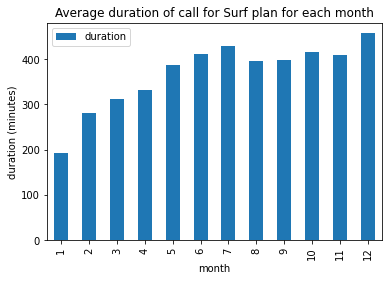

In [41]:
surf_df.plot.bar(x='month',y='duration')
plt.title('Average duration of call for Surf plan for each month')
plt.xlabel('month')
plt.ylabel('duration (minutes)')
plt.show()

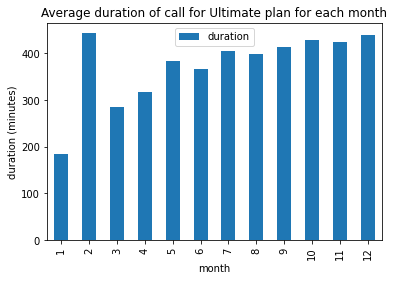

In [42]:
ult_df.plot.bar(x='month',y='duration')
plt.title('Average duration of call for Ultimate plan for each month')
plt.xlabel('month')
plt.ylabel('duration (minutes)')
plt.show()

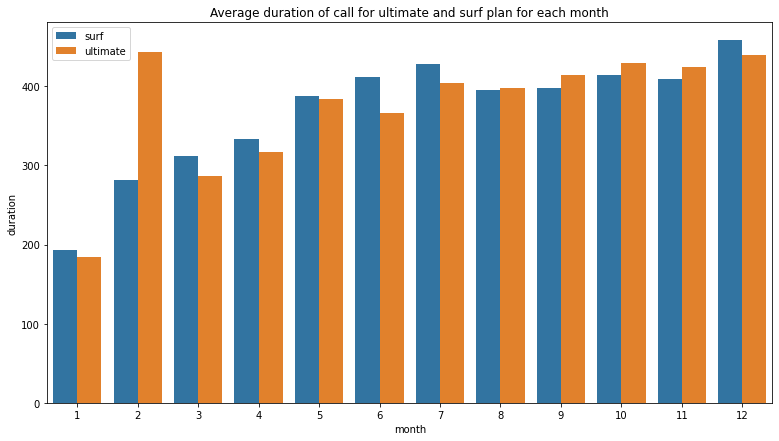

In [43]:
fig, ax = plt.subplots(figsize=[13, 7])
sns.barplot(x='month',y='duration',data=avg_calls_per_month, hue="plan", ax=ax)

plt.title('Average duration of call for ultimate and surf plan for each month')
plt.ylabel('duration')
plt.xlabel('month')
plt.legend()
plt.show()

In [44]:
# Comparing the number of minutes users of each plan require each month and plot a bar chart.
total_mins_per_month = summary_df.pivot_table(index=['month','plan'],values='duration',aggfunc='sum').reset_index()
surf_df = total_mins_per_month.query("plan=='surf'")
ult_df = total_mins_per_month.query("plan=='ultimate'")
total_mins_per_month

,month,plan,duration
0,1,surf,386.0
1,1,ultimate,735.0
2,2,surf,2532.0
3,2,ultimate,2663.0
4,3,surf,7163.0
5,3,ultimate,3434.0
6,4,surf,16646.0
7,4,ultimate,6659.0
8,5,surf,29070.0
9,5,ultimate,11142.0


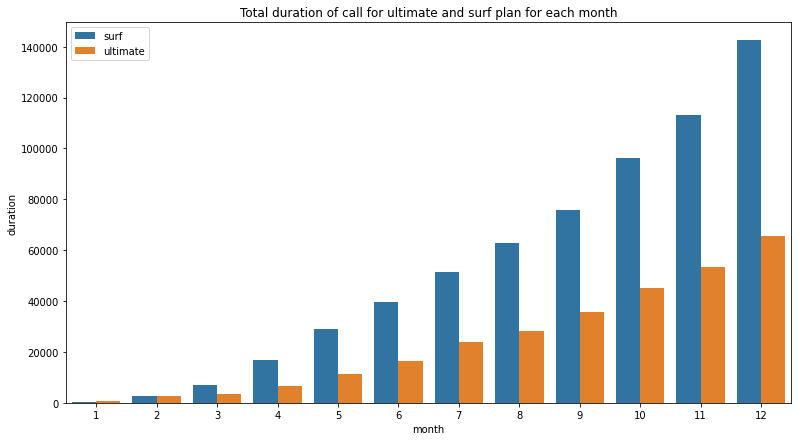

In [45]:
fig, ax = plt.subplots(figsize=[13, 7])
sns.barplot(x='month',y='duration',data=total_mins_per_month, hue="plan", ax=ax)

plt.title('Total duration of call for ultimate and surf plan for each month')
plt.ylabel('duration')
plt.xlabel('month')
plt.legend()
plt.show()

Below we calculate the mean and varience of the duration of the calls made with the different plans.

In [46]:
# Calculating the mean and the variance of the monthly call duration
total_mins_per_month.pivot_table(index='plan',values='duration',aggfunc=['mean','var'])


,mean,var
,duration,duration
plan,,
surf,53121.583333,2.147071e+09
ultimate,24402.500000,4.660100e+08


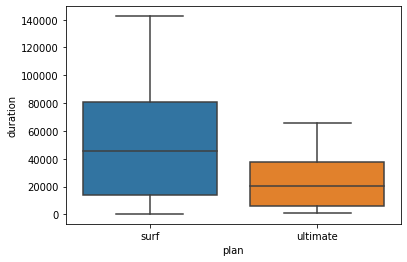

In [47]:
# Ploting a boxplot to visualize the distribution of the monthly call duration
sns.boxplot(x ='plan',y ='duration',data = total_mins_per_month)
plt.show()

Observation: For calls users for the surf plan have a median duration of above 40000 minutes and the ultimate users have a median call duration of about 20000 minutes. This shows us that users on the surf plan call more or are in longer calls than users in the ultimate plan.

### Messages

In [48]:
# Comparing the number of messages users of each plan tend to send each month
messages_per_month = summary_df.pivot_table(index=['plan','month'],values='message_count',aggfunc='sum').reset_index()
messages_per_month

,plan,month,message_count
0,surf,1,21.0
1,surf,2,108.0
2,surf,3,351.0
3,surf,4,870.0
4,surf,5,1849.0
5,surf,6,2454.0
6,surf,7,3271.0
7,surf,8,4662.0
8,surf,9,5968.0
9,surf,10,8020.0


In [49]:
mess_surf_df = messages_per_month.query("plan=='surf'")
mess_ult_df = messages_per_month.query("plan=='ultimate'")

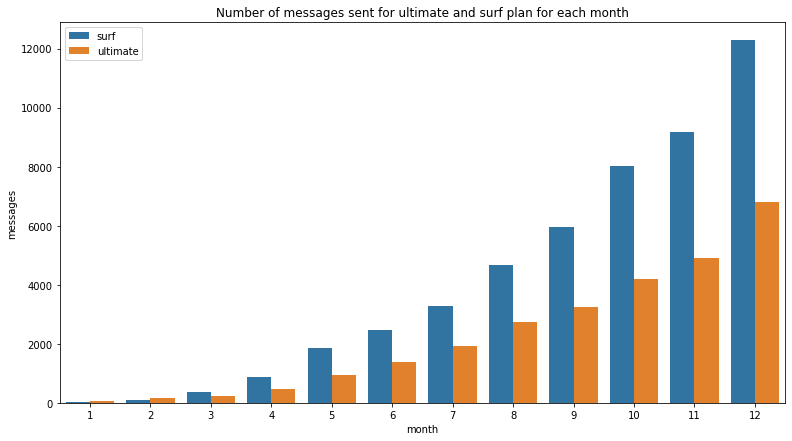

In [50]:
fig, ax = plt.subplots(figsize=[13, 7])
sns.barplot(x='month',y='message_count',data=messages_per_month, hue="plan", ax=ax)

plt.title('Number of messages sent for ultimate and surf plan for each month')
plt.ylabel('messages')
plt.xlabel('month')
plt.legend()
plt.show()

In [51]:
# Mean and varience of the monthly messages
messages_per_month.pivot_table(index='plan',values='message_count',aggfunc=['mean','var'])

,mean,var
,message_count,message_count
plan,,
surf,4084.500000,1.610722e+07
ultimate,2253.083333,4.699501e+06


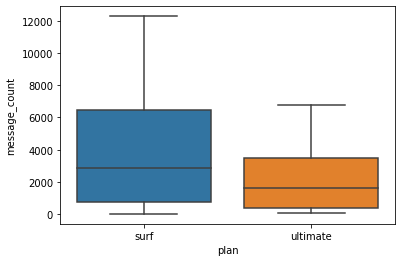

In [52]:
# Ploting a boxplot to visualize the distribution of the monthly messages
sns.boxplot(x ='plan',y ='message_count',data = messages_per_month)
plt.show()

Observation: We see that the users on the surf plan send a median of above 2000 message anf the users in the ultimate plan send a median of below 2000 messages. It is seen that surf users send more messages than the ultimate users. Most users on the surf plan send more messages than the median amount.

### Internet

In [53]:
# Comparing the amount of internet traffic consumed by users per plan
mb_per_month = summary_df.pivot_table(index=['plan','month'],values='mb_used',aggfunc='sum').reset_index()
mb_per_month

,plan,month,mb_used
0,surf,1,10240.00
1,surf,2,112640.00
2,surf,3,319488.00
3,surf,4,625664.00
4,surf,5,1113088.00
5,surf,6,1538048.00
6,surf,7,2091008.00
7,surf,8,2800640.00
8,surf,9,3313665.26
9,surf,10,4222976.49


In [54]:
mb_surf_df = mb_per_month.query("plan=='surf'")
mb_ult_df = mb_per_month.query("plan=='ultimate'")

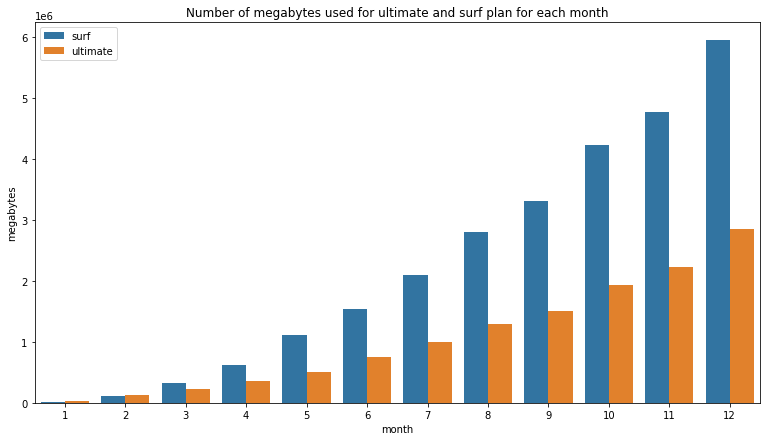

In [55]:
fig, ax = plt.subplots(figsize=[13, 7])
sns.barplot(x='month',y='mb_used',data=mb_per_month, hue="plan", ax=ax)

plt.title('Number of megabytes used for ultimate and surf plan for each month')
plt.ylabel('megabytes')
plt.xlabel('month')
plt.legend()
plt.show()

In [56]:
# Mean and varience of the monthly megabytes used
mb_per_month.pivot_table(index='plan',values='mb_used',aggfunc=['mean','var'])

,mean,var
,mb_used,mb_used
plan,,
surf,2.237184e+06,3.909618e+12
ultimate,1.063339e+06,8.264532e+11


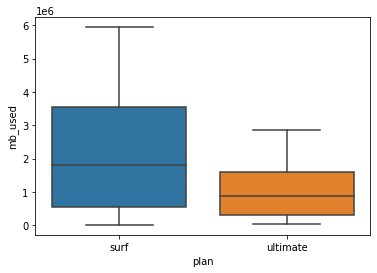

In [57]:
# Plot a boxplot to visualize the distribution of the monthly messages
sns.boxplot(x ='plan',y ='mb_used',data = mb_per_month)
plt.show()

Observation: We see that surf users use a median of just below 2000GB and ultimate users use a median of just belwo 1000GB. This hows that surf users use more data than users that are on the ultimate plan. Most users on the surf use data above the median amount.

# Revenue

Below we statistically describe the revenue between the plans.

count    1573.000000
mean       58.843573
std        54.536389
min        20.000000
25%        20.000000
50%        40.000000
75%        80.000000
max       572.280000
Name: revenue, dtype: float64


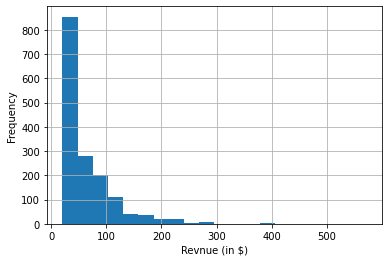

In [58]:
print(summary_df.loc[summary_df['plan']=='surf']['revenue'].describe())
summary_df.loc[summary_df['plan']=='surf']['revenue'].hist(bins=20)
plt.xlabel('Revnue (in $)')
plt.ylabel('Frequency')
plt.show()

count    720.000000
mean      72.313889
std       11.395108
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: revenue, dtype: float64


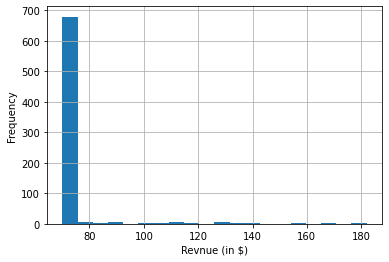

In [59]:
print(summary_df.loc[summary_df['plan']=='ultimate']['revenue'].describe())
summary_df.loc[summary_df['plan']=='ultimate']['revenue'].hist(bins=20)
plt.xlabel('Revnue (in $)')
plt.ylabel('Frequency')
plt.show()

It is seen that a lot of the users (75% of them) using the ultimate plan just pay the monthly payment and do not go over their plan. There are a few outliers. Whereas users on the surf plan (25% of them) pay the actual monthly payment fee. The other 75% go over their plan and pay more than the surf monthly fee. This means that they go over their plan.

# Test statistical hypotheses


Below we creating a hyphothesis test on the average revenue from users of the Ultimate and Surf plans and seeing if they differ.

Null Hypothesis: The average revenue between the plans does not differ.<br>
Alternative hypothesis: The average revenue between the plans does differ.<br>
p-value of 0.05<br>
Using a ttest because we're comparing two mean revenues from two groups.

In [60]:
# Test the hypotheses

avg_rev_surf = summary_df.loc[summary_df['plan']=='surf']['revenue']
avg_rev_ult = summary_df.loc[summary_df['plan']=='ultimate']['revenue']

results = st.ttest_ind(
        avg_rev_surf,
        avg_rev_ult)

print('p-value: ',results.pvalue)

p-value:  6.558653172317893e-11


Report: The hypothesis t-test gives a p-value that's smaller than 0.05 for the surf and ultimate plan the average revenues, therefore the null hypothesis is rejected. This implies that the revenues between the plans is not the same.

Below we creating a hypothesis test on the average revenue from users in the NY-NJ area and the other regions and seeing if the revenues from these two areas is different.

Null Hypothesis: The average revenue from the users in NY-NJ region is not different from that of the others in other regions.<br>
Alternative hypothesis: The average revenue from the users in NY-NJ region is different from that of the others in other regions.<br>
p-value of 0.05<br>
Using a ttest because we're comparing two mean revenues from two groups.

In [61]:
# Test the hypotheses
avg_rev_NYNJ = summary_df.loc[summary_df['city'].str.contains('NY-NJ')]['revenue']
avg_rev_other = summary_df.loc[-(summary_df['city'].str.contains('NY-NJ'))]['revenue']

results = st.ttest_ind(
        avg_rev_NYNJ,
        avg_rev_other)

print('p-value: ',results.pvalue)

p-value:  0.03778460504778467


Report: The hypothesis t-test gives a p-value that's smaller than 0.05 for the users that stay in the NY-NJ region and the revenue of others staying in other regeions, therefore the null hypothesis is rejected. This implies that the revenues between the users that stay in the NY-NJ region is different from the other users that do not stay in the region.

# General conclusion

From the above analysis during the preprocessing phase all the data frames did not have any missing values or duplicated data. There dataframes with date columns had an object type and that was fixed by changing the columns to a datetime datatype. From the user behaviour it is seen that most surf users use more data, minutes and send more message than users that are on the ultimate plan. The box plots are clearly right skewed for the data and message data.This means that most of the users use more than the median. <br>
The hypothesis t-test gives a p-value that's smaller than 0.05 for the surf and ultimate plan the average revenues. This means that the null hypothesis has to be rejected and implies that the revenues between the plans is not the same. <br>
The hypothesis t-test gives a p-value that's smaller than 0.05 for the users that stay in the NY-NJ region and the revenue of others staying in other regeions. This means that the null hypothesis has to be rejected and implies that the revenues between the users that stay in the NY-NJ region is different from the other users that do not stay in the region. <br>
It is recommended that the top payers in the surf plan be offered an oportunity to go to the ultimate plan as our analysis shows that they are unlikey to exceed the plan and incur addition costs.